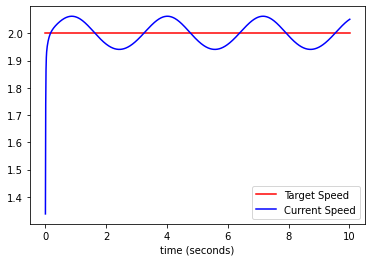

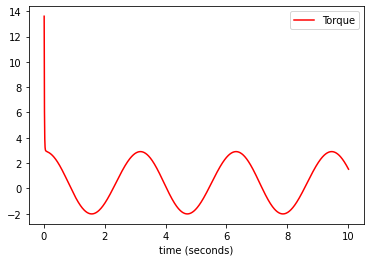

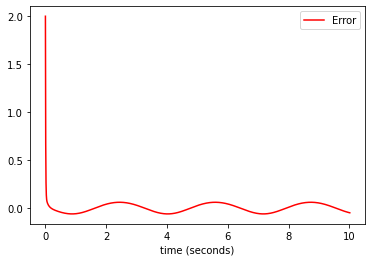

In [3]:
import sys
sys.path.append("../../")

from lib.data.dataplot import *
from lib.system.basic import *
from lib.system.arm import *
from lib.system.controllers import *
from lib.utils.time import *

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("target", "Target Speed")
dp.add_y("current", "Current Speed")

fp = DataPlotter()
fp.set_x("time (seconds)")
fp.add_y("torque", "Torque")

ep = DataPlotter()
ep.set_x("time (seconds)")
ep.add_y("error", "Error")

arm = Arm(1.0, 0.5, 0.9)

target_speed = 2.0
ctrl = PI_Controller(6.0, 80.0)

t = Time(use_fake_time = True)
t.start()

current_speed = arm.omega

while t.get() < 10:
    
    t.sleep(0.01)
    delta_t = t.elapsed()
    
    error = target_speed - current_speed
    torque = ctrl.evaluate(delta_t, error)
    (_, current_speed) = arm.evaluate(delta_t, torque)
    
    dp.append_x(t.get())
    dp.append_y("target", target_speed)
    dp.append_y("current", current_speed)
    
    fp.append_x(t.get())
    fp.append_y("torque", torque)

    ep.append_x(t.get())
    ep.append_y("error", error)

dp.plot()
fp.plot()
ep.plot()
